In [1]:
import cv2
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
def check(point, shape):
    print(point, shape)
    y, x = point
    if y >= shape[0] or x >= shape[1]:
        return False
    if y < 0 or x < 0:
        return False
    return True

In [3]:
def update_corners(top_left, bottom_right, shape, inc):
    y1, x1 = top_left
    y2, x2 = bottom_right
    print(shape)
    h = shape[0]
    w = shape[1]
    if y1 < 0:
        y1 = 0
        y2 = 2 * inc
    elif y2 >= h:
        y2 = h
        y1 = h - (2 * inc)
    if x1 < 0:
        x1 = 0
        x2 = 2 * inc
    elif x2 >= w:
        x2 = w
        x1 = w - (2 * inc)
    return ((y1, x1), (y2, x2))

In [12]:
def crop(event, x, y, flags, param):
    inc = 75
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x, y)
        while inc <= 150:
            top_left = y - inc, x - inc
            bottom_right = y + inc, x + inc
            top_left, bottom_right = update_corners(top_left, bottom_right, img.shape, inc)
            print(top_left, bottom_right)
            crop_img = img[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1]]
            print(crop_img.shape)
            cv2.imwrite('image/1/save1.jpg', crop_img)
            img1 = pyplot.imread('image/1/save1.jpg')
            img2 = pyplot.imread('1.jpg')
            detector = MTCNN()
            faces = detector.detect_faces(img1)
            print(faces)
            if len(faces) > 0:
                pyplot.imshow(img2)
                ax = pyplot.gca()
                for face in faces:
                    x, y, width, height = face['box']
                    x = top_left[1] + x
                    y = top_left[0] + y
                    rect = Rectangle((x, y), width, height, fill=False, color='red')
                    ax.add_patch(rect)
                    pyplot.show()
                break
            else:
                inc = inc + 25

421 237
(560, 830, 3)
(162, 346) (312, 496)
(150, 150, 3)
[]
(560, 830, 3)
(137, 321) (337, 521)
(200, 200, 3)
[{'box': [-5, -50, 209, 263], 'confidence': 0.9871925115585327, 'keypoints': {'left_eye': (48, 44), 'right_eye': (151, 45), 'nose': (98, 102), 'mouth_left': (54, 158), 'mouth_right': (143, 159)}}]


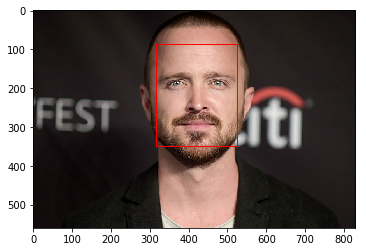

In [20]:
cv2.namedWindow("image")
img = cv2.imread("1.jpg")
cv2.setMouseCallback("image", crop)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import keras
model = keras.models.load_model('nweights.h5')

In [15]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [21]:
one = datagen.flow_from_directory('image', class_mode='categorical', batch_size=1, shuffle = False)

Found 1 images belonging to 1 classes.


In [22]:
import numpy as np
v = model.predict(one)
print(np.argmax(v[0]))

22


In [23]:
import imutils
aligned_img = imutils.rotate(cv2.imread('image/1/save1.jpg'), -np.argmax(v[0]))
cv2.imwrite('unknown_image.jpg', aligned_img)
cv2.imshow('aligned image', aligned_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
import face_recognition

# Load the jpg files into numpy arrays
first_image = face_recognition.load_image_file("first.jpg")
second_image = face_recognition.load_image_file("second.jpg")
unknown_image = face_recognition.load_image_file("unknown_image.jpg")

# Get the face encodings for each face in each image file
# Since there could be more than one face in each image, it returns a list of encodings.
# But since I know each image only has one face, I only care about the first encoding in each image, so I grab index 0.
try:
    first_face_encoding = face_recognition.face_encodings(first_image)[0]
    second_face_encoding = face_recognition.face_encodings(second_image)[0]
    unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
except IndexError:
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()

known_faces = [
    first_face_encoding,
    second_face_encoding
]

# results is an array of True/False telling if the unknown face matched anyone in the known_faces array
results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

print("Is the unknown face a picture of first person? {}".format(results[0]))
print("Is the unknown face a picture of second person? {}".format(results[1]))
print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...
Is the unknown face a picture of first person? False
Is the unknown face a picture of second person? True
Is the unknown face a new person that we've never seen before? False
